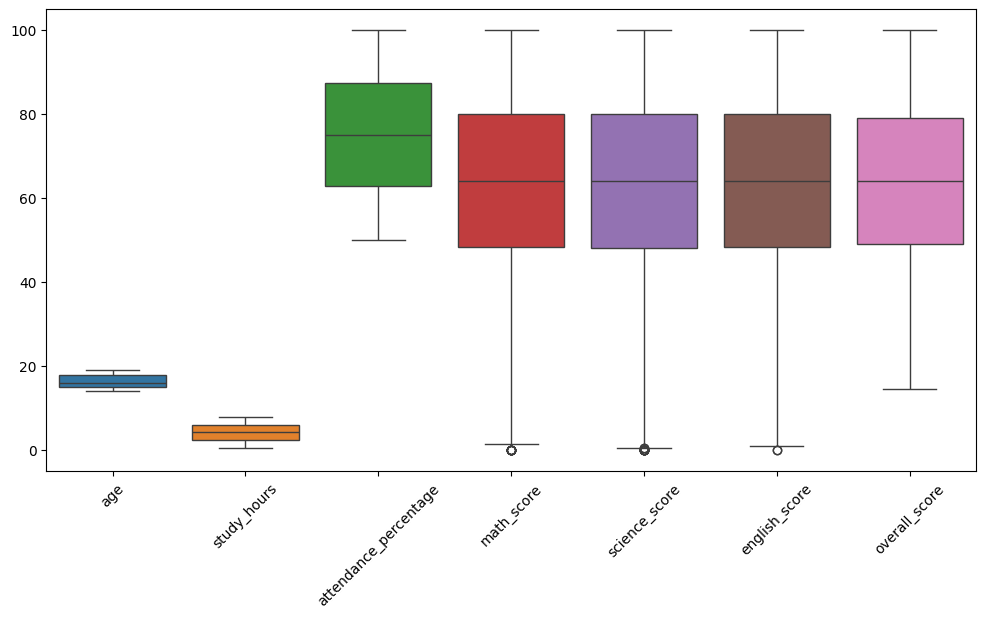

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()


In [39]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['age', 'study_hours', 'attendance_percentage', 'math_score',
       'science_score', 'english_score', 'overall_score', 'pass_fail'],
      dtype='object')

In [40]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['age', 'study_hours', 'attendance_percentage', 'math_score',
       'science_score', 'english_score', 'overall_score', 'pass_fail'],
      dtype='object')

In [41]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower, upper)
    return df


In [42]:
for col in num_cols:
    df = cap_outliers_iqr(df, col)


In [44]:
# Numerical → median
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical → mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14428\1945054874.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14428\1945054874.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [45]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [46]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col] = df[col].fillna(df[col].median())


In [47]:
df.isnull().sum()


age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
pass_fail                0
dtype: int64

In [48]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)
    return df

for col in num_cols:
    df = cap_outliers_iqr(df, col)



In [49]:
X = df.drop('pass_fail', axis=1)
y = df['pass_fail']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [51]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)



NameError: name 'Pipeline' is not defined

In [52]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


NameError: name 'Pipeline' is not defined

In [53]:
from sklearn.pipeline import Pipeline


In [54]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


NameError: name 'OneHotEncoder' is not defined

In [55]:
from sklearn.preprocessing import OneHotEncoder


In [56]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


NameError: name 'ColumnTransformer' is not defined

In [57]:
from sklearn.compose import ColumnTransformer


In [58]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [59]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [60]:
X = df.drop(columns=['final_grade', 'pass_fail'])
y = df['pass_fail']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [62]:
def evaluate_model(name, model):
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }


In [63]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=7)),
    ('SVM', SVC(kernel='rbf'))
]


In [64]:
results = []

for name, model in models:
    results.append(evaluate_model(name, model))

results_df = pd.DataFrame(results)
results_df


NameError: name 'preprocessor' is not defined

In [65]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [66]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=7)),
    ('SVM', SVC())
]


In [68]:
results = []

for name, model in models:
    results.append(evaluate_model(name, model))

results_df = pd.DataFrame(results)
results_df


ValueError: A given column is not a column of the dataframe

In [69]:
# Target
y = df['pass_fail']

# Features (STRICT)
X = df.drop(columns=['final_grade', 'pass_fail'])


In [70]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", num_cols)
print("Categorical:", cat_cols)



Numeric: ['age', 'study_hours', 'attendance_percentage', 'math_score', 'science_score', 'english_score', 'overall_score']
Categorical: ['gender', 'school_type', 'parent_education', 'internet_access', 'travel_time', 'extra_activities', 'study_method']


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [75]:
results = []

for name, model in models:
    results.append(evaluate_model(name, model))

pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.9950,0.995511,0.992048,0.993776
1,Decision Tree,0.9994,0.999006,0.999503,0.999255
2,Random Forest,0.9992,0.999502,0.998509,0.999005
3,KNN,0.9434,0.922738,0.937873,0.930244
4,SVM,0.9904,0.990509,0.985586,0.988042


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

final_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [77]:
import pandas as pd

new_student = pd.DataFrame([{
    'age': 16,
    'gender': 'male',
    'school_type': 'public',
    'parent_education': 'high school',
    'study_hours': 3,
    'attendance_percentage': 85,
    'internet_access': 'yes',
    'travel_time': 20,
    'extra_activities': 'yes',
    'study_method': 'self',
    'math_score': 78,
    'science_score': 72,
    'english_score': 75,
    'overall_score': 75
}])


In [78]:
prediction = final_model.predict(new_student)
prediction


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [79]:
X.columns


Index(['age', 'gender', 'school_type', 'parent_education', 'study_hours',
       'attendance_percentage', 'internet_access', 'travel_time',
       'extra_activities', 'study_method', 'math_score', 'science_score',
       'english_score', 'overall_score'],
      dtype='object')

In [80]:
new_student = pd.DataFrame([{
    'age': 18,
    'gender': 'male',
    'school_type': 'public',
    'parent_education': 'high school',
    'study_hours': 3,
    'attendance_percentage': 85,
    'internet_access': 'yes',
    'travel_time': 30,
    'extra_activities': 'yes',
    'study_method': 'self',
    'math_score': 78,
    'science_score': 72,
    'english_score': 75,
    'overall_score': 75
}])


In [81]:
prediction = final_model.predict(new_student)
prediction


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [82]:
X.head(1)


,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score
0,14.0,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1


In [83]:
new_student = X.iloc[[0]].copy()


In [84]:
new_student.loc[:, 'age'] = 18
new_student.loc[:, 'gender'] = 'male'
new_student.loc[:, 'school_type'] = 'public'
new_student.loc[:, 'parent_education'] = 'high school'
new_student.loc[:, 'study_hours'] = 3
new_student.loc[:, 'attendance_percentage'] = 85
new_student.loc[:, 'internet_access'] = 'yes'
new_student.loc[:, 'travel_time'] = 30
new_student.loc[:, 'extra_activities'] = 'yes'
new_student.loc[:, 'study_method'] = 'self'
new_student.loc[:, 'math_score'] = 78
new_student.loc[:, 'science_score'] = 72
new_student.loc[:, 'english_score'] = 75
new_student.loc[:, 'overall_score'] = 75


In [85]:
prediction = final_model.predict(new_student)
prediction


array([1])

In [86]:
print("PASS" if prediction[0] == 1 else "FAIL")


PASS
